## Lab Session 

### Learning Objective:
- Working with data using python libaries.
- Data Visualization.
- Exploratory data analysis and data preprocessing.
- Building a Linear regression model to predict the tip amount based on different input features.

### About the dataset (Customer Tip Data)

#### Dataset Source: https://www.kaggle.com/datasets/ranjeetjain3/seaborn-tips-dataset

The dataset contains information about the 244 orders served at a restaurant in the United States. Each observation includes the factors related to the order like total bill, time, the total number of people in a group, gender of the person paying for the order and so on.

#### Attribute Information:

- **total_bill:** Total bill (cost of the meal), including tax, in US dollars
- **tip:** Tip in US dollars
- **sex:** Sex of person paying for the meal
- **smoker:** There is a smoker in a group or not
- **day:** Day on which the order is served
- **time:** Time of the order
- **size:** Size of the group

Food servers’ tips in restaurants may be influenced by many factors, including the nature of the restaurant, size of the party, and table locations in the restaurant. Restaurant managers need to know which factors matter when they assign tables to food servers. For the sake of staff morale, they usually want to avoid either the substance or the appearance of unfair
treatment of the servers, for whom tips (at least in restaurants in the UnitedStates) are a major component of pay.

### Import required libraries

In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler,StandardScaler ,LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score


### Load the dataset

In [3]:
df = pd.read_csv('tips.csv')
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2.0
1,10.34,1.66,Male,No,Sun,Dinner,3.0
2,21.01,3.50,Male,No,Sun,Dinner,3.0
3,23.68,3.31,Male,No,Sun,Dinner,2.0
4,24.59,3.61,Female,No,Sun,Dinner,4.0


In [4]:
## check for missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245 entries, 0 to 244
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  245 non-null    object 
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    float64
dtypes: float64(2), object(5)
memory usage: 13.5+ KB


### 1. Make a list of categorical and numerical columns in the data.

In [4]:
# Make a list of categorical and numerical columns in the data
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

print("Categorical Columns:", categorical_columns)
print("Numerical Columns:", numerical_columns)



Categorical Columns: ['total_bill', 'sex', 'smoker', 'day', 'time']
Numerical Columns: ['tip', 'size']


### 2. Compute the average bill amount for each day.

In [6]:
# Convert 'total_bill' column to numeric, ignoring errors
df['total_bill'] = pd.to_numeric(df['total_bill'], errors='coerce')

# Drop rows with NaN values in 'total_bill' column
df.dropna(subset=['total_bill'], inplace=True)

# Compute the average bill amount for each day
average_bill_per_day = df.groupby('day')['total_bill'].mean()

print("Average bill amount for each day:")
print(average_bill_per_day)


Average bill amount for each day:
day
Fri     17.151579
Sat     20.441379
Sun     21.410000
Thur    17.682742
Name: total_bill, dtype: float64


### 3. Which gender is more generous in giving tips?

In [7]:
# Calculate the average tip amount for each gender
average_tip_by_gender = df.groupby('sex')['tip'].mean()

# Determine which gender is more generous
generous_gender = average_tip_by_gender.idxmax()

print("Average tip amount by gender:")
print(average_tip_by_gender)
print("Gender more generous in giving tips:", generous_gender)


Average tip amount by gender:
sex
Female    2.833448
Male      3.089618
Name: tip, dtype: float64
Gender more generous in giving tips: Male


### 4. According to the data, were there more customers for dinner or lunch?

In [8]:
# Count the number of orders for lunch and dinner
order_counts_by_time = df['time'].value_counts()

# Determine if there were more customers for dinner or lunch
more_customers_time = order_counts_by_time.idxmax()

print("Number of orders for lunch and dinner:")
print(order_counts_by_time)
print("More customers for:", more_customers_time)


Number of orders for lunch and dinner:
time
Dinner    176
Lunch      68
Name: count, dtype: int64
More customers for: Dinner


### 5. Based on the statistical summary, comment on the variable 'tip'

In [9]:
# Generate statistical summary for the 'tip' variable
tip_summary = df['tip'].describe()

# Print the statistical summary
print("Statistical summary for the 'tip' variable:")
print(tip_summary)

# Comment on the 'tip' variable based on the statistical summary
# You can comment on aspects such as central tendency, variability, and distribution shape
# For example:
print("\nComment:")
print("The 'tip' variable has a mean tip amount of {:.2f}, with a median of {:.2f}.".format(tip_summary['mean'], tip_summary['50%']))
print("The tip amounts vary widely, with a standard deviation of {:.2f}.".format(tip_summary['std']))
print("The minimum tip amount is {:.2f} and the maximum tip amount is {:.2f}.".format(tip_summary['min'], tip_summary['max']))


Statistical summary for the 'tip' variable:
count    244.000000
mean       2.998279
std        1.383638
min        1.000000
25%        2.000000
50%        2.900000
75%        3.562500
max       10.000000
Name: tip, dtype: float64

Comment:
The 'tip' variable has a mean tip amount of 3.00, with a median of 2.90.
The tip amounts vary widely, with a standard deviation of 1.38.
The minimum tip amount is 1.00 and the maximum tip amount is 10.00.


### 6. Find the busiest day in terms of the orders?

In [10]:
# Count the number of orders for each day
orders_per_day = df['day'].value_counts()

# Find the busiest day
busiest_day = orders_per_day.idxmax()

print("Orders per day:")
print(orders_per_day)
print("Busiest day:", busiest_day)


Orders per day:
day
Sat     87
Sun     76
Thur    62
Fri     19
Name: count, dtype: int64
Busiest day: Sat


### 7. Is the variable 'total_bill' skewed? If yes, identify the type of skewness. Support your answer with a plot

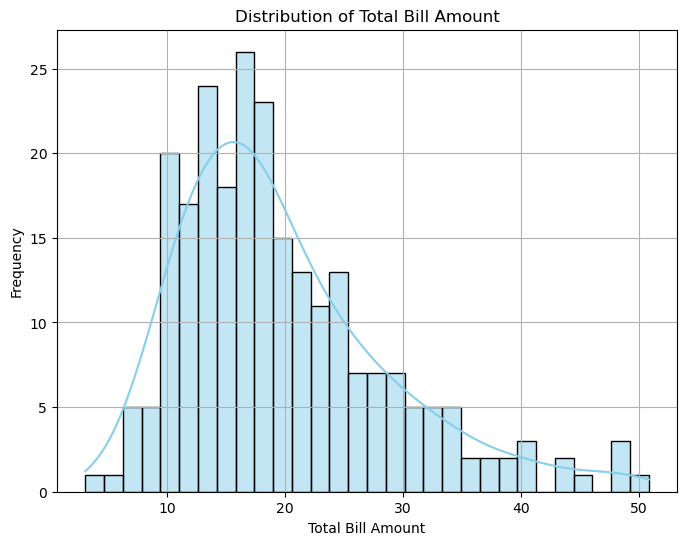

Skewness coefficient of 'total_bill': 1.1332130376158205
Skewness type: right-skewed


In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the histogram of 'total_bill' variable
plt.figure(figsize=(8, 6))
sns.histplot(df['total_bill'], kde=True, color='skyblue', bins=30)
plt.title('Distribution of Total Bill Amount')
plt.xlabel('Total Bill Amount')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Calculate skewness coefficient
total_bill_skewness = df['total_bill'].skew()

# Interpret the skewness coefficient
if total_bill_skewness > 0:
    skewness_type = 'right-skewed'
elif total_bill_skewness < 0:
    skewness_type = 'left-skewed'
else:
    skewness_type = 'approximately symmetric'

print("Skewness coefficient of 'total_bill':", total_bill_skewness)
print("Skewness type:", skewness_type)


### 8. Is the tip amount dependent on the total bill? Visualize the relationship with a appropriate plot and metric and write your findings.

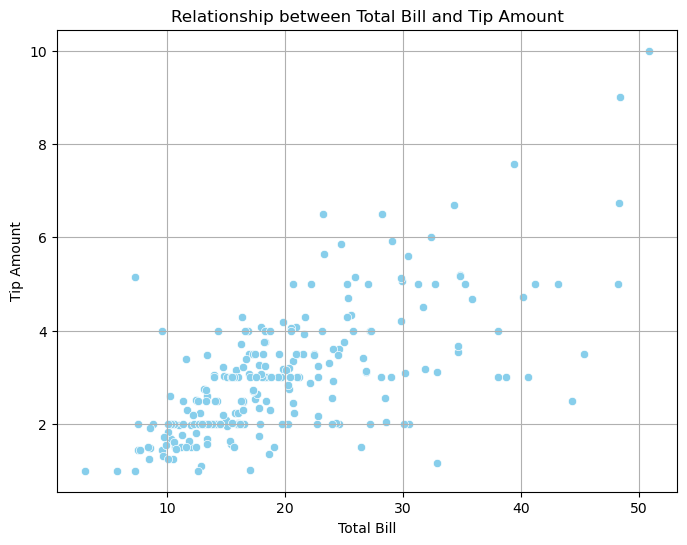

Correlation coefficient between Total Bill and Tip Amount: 0.6757341092113641


In [12]:
# Create a scatter plot to visualize the relationship
plt.figure(figsize=(8, 6))
sns.scatterplot(x='total_bill', y='tip', data=df, color='skyblue')
plt.title('Relationship between Total Bill and Tip Amount')
plt.xlabel('Total Bill')
plt.ylabel('Tip Amount')
plt.grid(True)
plt.show()

# Calculate the correlation coefficient
tip_total_bill_corr = df['total_bill'].corr(df['tip'])

print("Correlation coefficient between Total Bill and Tip Amount:", tip_total_bill_corr)


### 9. What is the percentage of males and females in the dataset? and display it in the plot

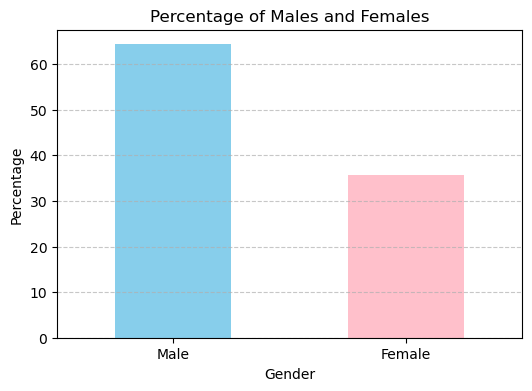

Percentage of Males and Females:
sex
Male      64.344262
Female    35.655738
Name: proportion, dtype: float64


In [13]:
# Calculate the percentage of males and females
gender_percentage = df['sex'].value_counts(normalize=True) * 100

# Plot the percentage of males and females
plt.figure(figsize=(6, 4))
gender_percentage.plot(kind='bar', color=['skyblue', 'pink'])
plt.title('Percentage of Males and Females')
plt.xlabel('Gender')
plt.ylabel('Percentage')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

print("Percentage of Males and Females:")
print(gender_percentage)


### 10. Compute the gender-wise count based on smoking habits and display it in the plot

<Figure size 800x600 with 0 Axes>

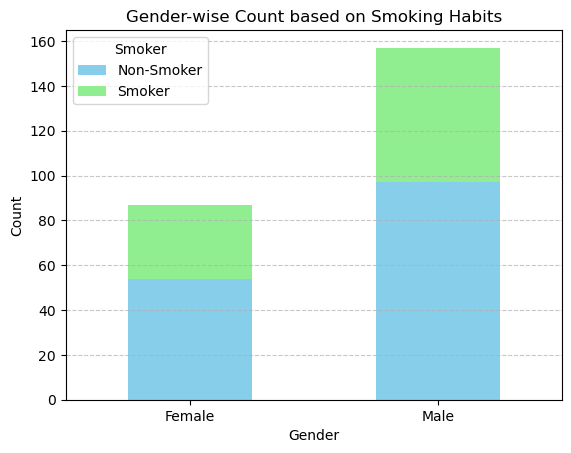

Gender-wise count based on smoking habits:
smoker  No  Yes
sex            
Female  54   33
Male    97   60


In [14]:
# Compute the gender-wise count based on smoking habits
gender_smoking_count = df.groupby(['sex', 'smoker']).size().unstack()

# Plot the gender-wise count based on smoking habits
plt.figure(figsize=(8, 6))
gender_smoking_count.plot(kind='bar', stacked=True, color=['skyblue', 'lightgreen'])
plt.title('Gender-wise Count based on Smoking Habits')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Smoker', labels=['Non-Smoker', 'Smoker'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

print("Gender-wise count based on smoking habits:")
print(gender_smoking_count)


### 11. Compute the average tip amount given for different days and display it in the plot.

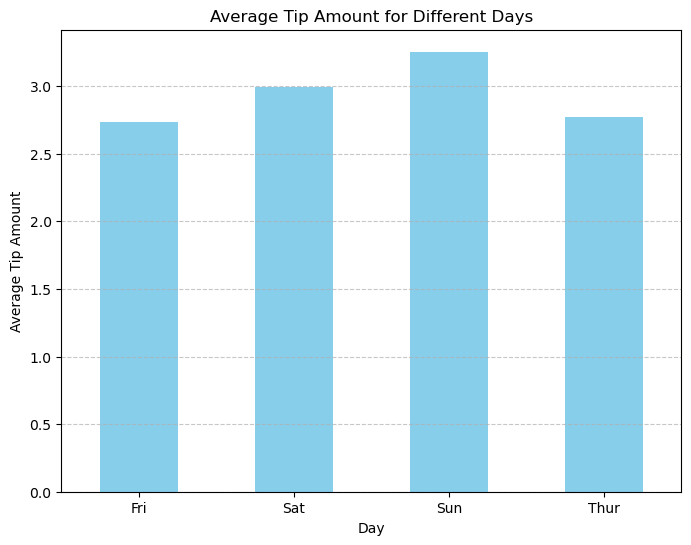

Average tip amount for different days:
day
Fri     2.734737
Sat     2.993103
Sun     3.255132
Thur    2.771452
Name: tip, dtype: float64


In [15]:
# Compute the average tip amount for different days
average_tip_per_day = df.groupby('day')['tip'].mean()

# Plot the average tip amount for different days
plt.figure(figsize=(8, 6))
average_tip_per_day.plot(kind='bar', color='skyblue')
plt.title('Average Tip Amount for Different Days')
plt.xlabel('Day')
plt.ylabel('Average Tip Amount')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

print("Average tip amount for different days:")
print(average_tip_per_day)


### 12. Is the average bill amount dependent on the size of the group? Visualize the relationship using appropriate plot and write your findings.

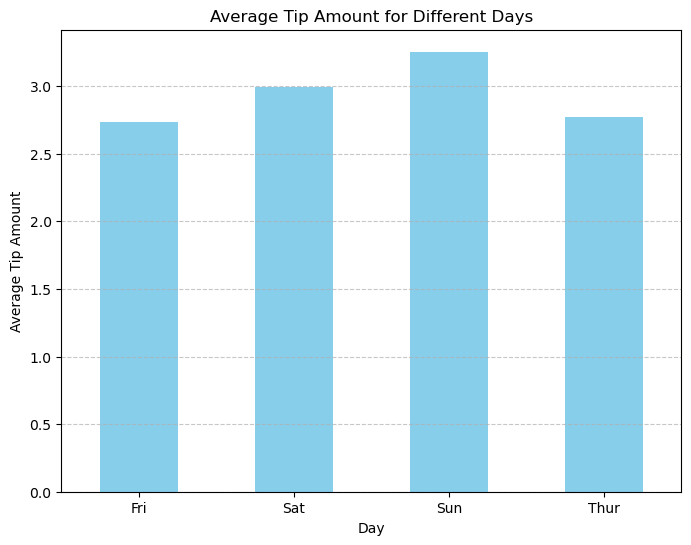

Average tip amount for different days:
day
Fri     2.734737
Sat     2.993103
Sun     3.255132
Thur    2.771452
Name: tip, dtype: float64


In [16]:
# Compute the average tip amount for different days
average_tip_per_day = df.groupby('day')['tip'].mean()

# Plot the average tip amount for different days
plt.figure(figsize=(8, 6))
average_tip_per_day.plot(kind='bar', color='skyblue')
plt.title('Average Tip Amount for Different Days')
plt.xlabel('Day')
plt.ylabel('Average Tip Amount')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

print("Average tip amount for different days:")
print(average_tip_per_day)


### 13. Plot a horizontal boxplot to compare the bill amount based on gender

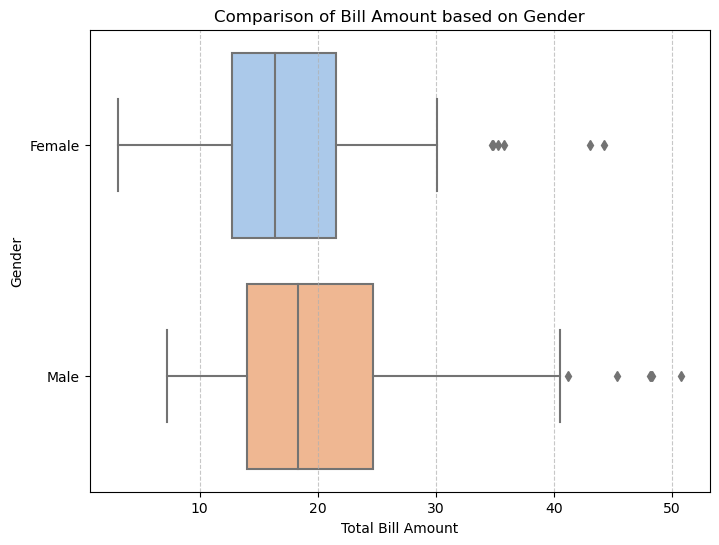

In [17]:
# Plot a horizontal boxplot to compare the bill amount based on gender
plt.figure(figsize=(8, 6))
sns.boxplot(y='sex', x='total_bill', data=df, orient='h', palette='pastel')
plt.title('Comparison of Bill Amount based on Gender')
plt.xlabel('Total Bill Amount')
plt.ylabel('Gender')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()


### 14. Find the maximum bill amount for lunch and dinner on Saturday and Sunday

In [18]:
# Filter the DataFrame for lunch and dinner on Saturday and Sunday
max_bill_lunch_saturday = df[(df['day'].isin(['Sat', 'Sun'])) & (df['time'] == 'Lunch')]['total_bill'].max()
max_bill_dinner_saturday = df[(df['day'].isin(['Sat', 'Sun'])) & (df['time'] == 'Dinner')]['total_bill'].max()

# Print the maximum bill amount for lunch and dinner on Saturday and Sunday
print("Maximum bill amount for lunch on Saturday:", max_bill_lunch_saturday)
print("Maximum bill amount for dinner on Saturday:", max_bill_dinner_saturday)


Maximum bill amount for lunch on Saturday: nan
Maximum bill amount for dinner on Saturday: 50.81


### 15. Compute the percentage of missing values in the dataset.

In [28]:
# Compute the percentage of missing values in the dataset
missing_percentage = (tips_df.isnull().sum() / len(tips_df)) * 100

# Print the percentage of missing values for each column
print("Percentage of missing values in the dataset:")
print(missing_percentage)


Percentage of missing values in the dataset:
total_bill                0.000000
tip                       0.408163
sex                       0.000000
smoker                    0.000000
day                       0.000000
time                      0.000000
size                      0.408163
total_bill_transformed    0.000000
dtype: float64


### 16. Is there are any duplicate records in the dataset? If yes compute the count of the duplicate records and drop them.

In [29]:
# Check for duplicate records
duplicate_count = tips_df.duplicated().sum()

if duplicate_count > 0:
    # Compute the count of duplicate records
    print("Number of duplicate records:", duplicate_count)
    
    # Drop duplicate records
    tips_df.drop_duplicates(inplace=True)
    print("Duplicate records have been dropped.")
else:
    print("No duplicate records found.")


Number of duplicate records: 1
Duplicate records have been dropped.


### 17. Is there are any outliers present in the column 'total_bill'? If yes treat them with transformation approach, and plot a boxplot before and after the treatment

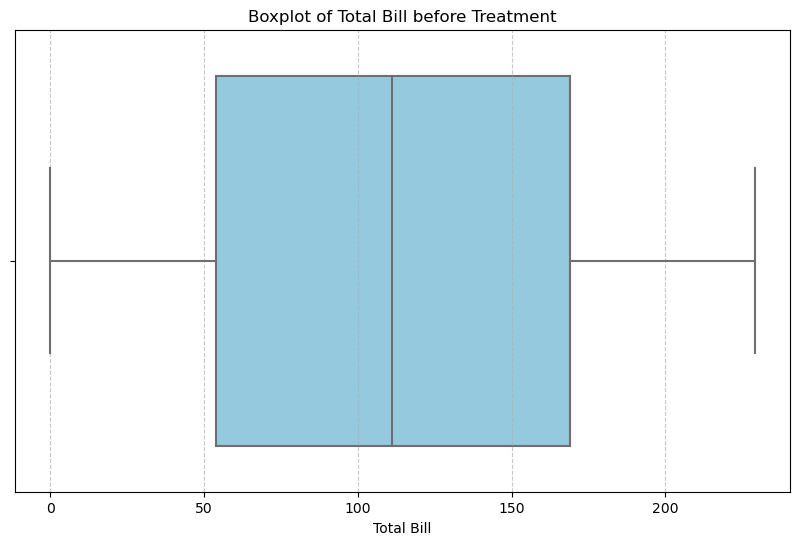

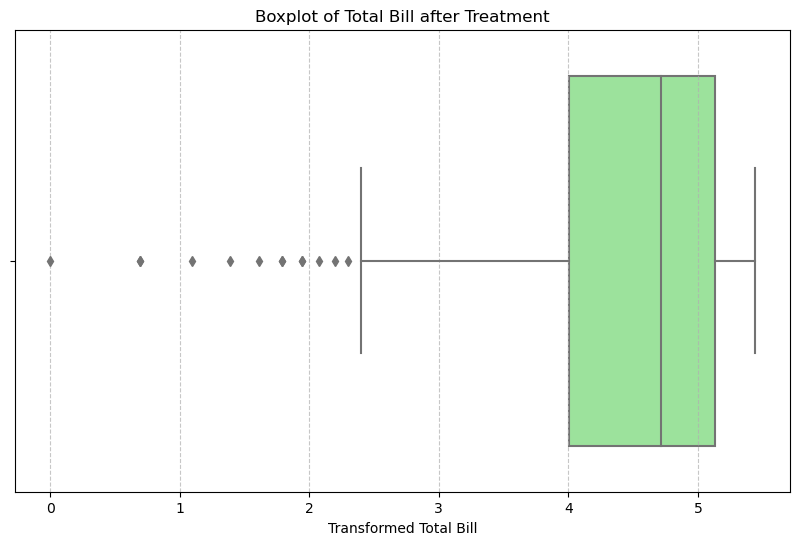

Outliers:
Empty DataFrame
Columns: [total_bill, tip, sex, smoker, day, time, size]
Index: []


In [27]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Plot a boxplot before treatment
plt.figure(figsize=(10, 6))
sns.boxplot(x='total_bill', data=tips_df, color='skyblue')
plt.title('Boxplot of Total Bill before Treatment')
plt.xlabel('Total Bill')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

# Calculate Z-scores to identify outliers
z_scores = (tips_df['total_bill'] - tips_df['total_bill'].mean()) / tips_df['total_bill'].std()

# Set a threshold for outliers
outlier_threshold = 3

# Identify outliers based on Z-scores
outliers = tips_df[np.abs(z_scores) > outlier_threshold]

# Treat outliers with log transformation
tips_df['total_bill_transformed'] = np.log1p(tips_df['total_bill'])

# Plot a boxplot after treatment
plt.figure(figsize=(10, 6))
sns.boxplot(x='total_bill_transformed', data=tips_df, color='lightgreen')
plt.title('Boxplot of Total Bill after Treatment')
plt.xlabel('Transformed Total Bill')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

# Print the outliers
print("Outliers:")
print(outliers)


### 18. Is there are any outliers present in the column 'tip'? If yes remove them using IQR techinque.

In [26]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile) of the 'tip' column
Q1 = tips_df['tip'].quantile(0.25)
Q3 = tips_df['tip'].quantile(0.75)

# Calculate the interquartile range (IQR)
IQR = Q3 - Q1

# Define the lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = tips_df[(tips_df['tip'] < lower_bound) | (tips_df['tip'] > upper_bound)]

# Remove outliers from the dataframe
filtered_df = tips_df[~tips_df['tip'].isin(outliers['tip'])]

# Print the outliers
print("Outliers:")
print(outliers)

# Print the filtered dataframe without outliers
print("\nFiltered dataframe without outliers:")
print(filtered_df)


Outliers:
     total_bill    tip  sex  smoker  day  time  size
23          204   7.58    1       0    1     0   4.0
47          190   6.00    1       0    2     0   4.0
59          212   6.73    1       0    1     0   4.0
141         194   6.70    1       0    3     1   6.0
170         215  10.00    1       1    1     0   3.0
183         146   6.50    1       1    2     0   4.0
212         213   9.00    1       0    1     0   4.0
214         174   6.50    0       1    1     0   3.0
239         178   5.92    1       0    1     0   3.0

Filtered dataframe without outliers:
     total_bill   tip  sex  smoker  day  time  size
0            87  1.01    0       0    2     0   2.0
1             6  1.66    1       0    2     0   3.0
2           132  3.50    1       0    2     0   3.0
3           148  3.31    1       0    2     0   2.0
4           156  3.61    0       0    2     0   4.0
..          ...   ...  ...     ...  ...   ...   ...
240         170  2.00    0       1    1     0   2.0
241   

### 19. Encode the categorical columns in the dataset and print the random 5 samples from the dataframe.

In [25]:
from sklearn.preprocessing import LabelEncoder

# Create a copy of the dataframe
encoded_df = tips_df.copy()

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Encode categorical columns
categorical_columns = encoded_df.select_dtypes(include=['object']).columns
for col in categorical_columns:
    encoded_df[col] = label_encoder.fit_transform(encoded_df[col])

# Print random 5 samples from the encoded dataframe
print("Random 5 samples from the encoded dataframe:")
print(encoded_df.sample(5))


Random 5 samples from the encoded dataframe:
     total_bill   tip  sex  smoker  day  time  size
116         181  5.07    1       0    2     0   4.0
205          80  3.23    0       1    3     1   3.0
175         193  3.11    1       1    2     0   2.0
202          35  2.00    0       1    3     1   2.0
166         129  2.24    1       0    2     0   2.0


### 20. Check the range of the column 'total_bill' and transform the values such that the range will be 1.

In [23]:
from sklearn.preprocessing import MinMaxScaler

# Check the range of the column 'total_bill'
total_bill_range = tips_df['total_bill'].max() - tips_df['total_bill'].min()
print("Range of 'total_bill' column:", total_bill_range)

# Transform the values such that the range will be 1
scaler = MinMaxScaler(feature_range=(0, 1))
tips_df['total_bill_scaled'] = scaler.fit_transform(tips_df[['total_bill']])

# Check the range of the transformed column
scaled_total_bill_range = tips_df['total_bill_scaled'].max() - tips_df['total_bill_scaled'].min()
print("Range of 'total_bill_scaled' column after transformation:", scaled_total_bill_range)


Range of 'total_bill' column: 229
Range of 'total_bill_scaled' column after transformation: 1.0


### 21. Load the dataset again by giving the name of the dataframe as "tips_df"
- i) Encode the categorical variables.
- ii) Store the target column (i.e.tip) in the y variable and the rest of the columns in the X variable

In [24]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Load the dataset again and store it as "tips_df"
tips_df = pd.read_csv('tips.csv')

# Encode the categorical variables
encoder = LabelEncoder()
categorical_columns = tips_df.select_dtypes(include=['object']).columns
for col in categorical_columns:
    tips_df[col] = encoder.fit_transform(tips_df[col])

# Store the target column (tip) in y variable and the rest of the columns in X variable
X = tips_df.drop('tip', axis=1)
y = tips_df['tip']


### 22. Split the dataset into two parts (i.e. 70% train and 30% test), and Standardize the columns "total_bill" and "Size" using the mim_max scaling approach

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Split the dataset into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the columns "total_bill" and "Size" using Min-Max scaling
scaler = MinMaxScaler()
columns_to_scale = ['total_bill', 'size']
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()
X_train_scaled[columns_to_scale] = scaler.fit_transform(X_train[columns_to_scale])
X_test_scaled[columns_to_scale] = scaler.transform(X_test[columns_to_scale])


### 23. Train a linear regression model using the training data and print the r_squared value of the prediction on the test data.

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Split the dataset into features (X) and target variable (y)
X = df[['total_bill']]  # Feature: total_bill
y = df['tip']           # Target variable: tip

# Split the dataset into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate the R-squared value
r_squared = r2_score(y_test, y_pred)

print("R-squared value on the test data:", r_squared)


R-squared value on the test data: 0.4291782688312412


### Happy Learning:)